<a href="https://colab.research.google.com/github/padmashree1995/zoho-assignment/blob/main/rotten_tomatoes_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas openpyxl


In [ ]:
pip install matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from google.colab import files
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import io
import joblib
import matplotlib.pyplot as plt


In [ ]:
# Step 1: Upload the dataset in Google Colab
print("Please upload the Excel file containing the dataset.")
uploaded = files.upload()

Please upload the Excel file containing the dataset.


Saving Rotten_Tomatoes_Movies3.xls to Rotten_Tomatoes_Movies3.xls


In [ ]:
file_name = list(uploaded.keys())[0]
data = pd.read_excel(uploaded[file_name])

<ipython-input-7-158e37233ace>:2: FutureWarning: Passing bytes to 'read_excel' is deprecated and will be removed in a future version. To read from a byte string, wrap it in a `BytesIO` object.
  data = pd.read_excel(uploaded[file_name])


In [ ]:
# Display basic information
print("\nDataset Overview:\n")
print(data.head())


Dataset Overview:

                                         movie_title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1                                        Please Give   
2                                                 10   
3                    12 Angry Men (Twelve Angry Men)   
4                       20,000 Leagues Under The Sea   

                                          movie_info  \
0  A teenager discovers he's the descendant of a ...   
1  Kate has a lot on her mind. There's the ethics...   
2  Blake Edwards' 10 stars Dudley Moore as George...   
3  A Puerto Rican youth is on trial for murder, a...   
4  This 1954 Disney version of Jules Verne's 20,0...   

                                   critics_consensus rating  \
0  Though it may seem like just another Harry Pot...     PG   
1  Nicole Holofcener's newest might seem slight i...      R   
2                                                NaN      R   
3  Sidney Lumet's feature debut is a superbly wri...  

In [ ]:
data.describe()

,in_theaters_date,on_streaming_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
count,15823,16636,16483.000000,16638.000000,16638.000000,16386.000000
mean,1999-10-24 22:10:52.973519488,2008-08-13 13:35:49.266650624,102.391494,60.466522,56.607104,60.470829
min,1914-06-01 00:00:00,1935-06-06 00:00:00,1.000000,0.000000,5.000000,0.000000
25%,1993-03-29 00:00:00,2003-01-28 00:00:00,90.000000,38.000000,12.000000,45.000000
50%,2006-08-04 00:00:00,2008-04-08 00:00:00,99.000000,66.000000,28.000000,62.000000
75%,2013-06-28 00:00:00,2014-05-12 00:00:00,111.000000,86.000000,76.000000,77.000000
max,2019-12-07 00:00:00,2019-11-01 00:00:00,2000.000000,100.000000,497.000000,100.000000
std,NaN,NaN,25.028011,28.587230,66.383800,20.462368


In [ ]:
data.tail()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
16633,Zoot Suit,"Based on a 1940s Los Angeles murder trial, thi...",NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,2003-05-27,104.0,MCA Universal Home Video,Rotten,56,9,74.0
16634,Zootopia,The modern mammal metropolis of Zootopia is a ...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",2016-03-04,2016-06-07,108.0,Walt Disney Animation Studios,Certified Fresh,97,279,92.0
16635,Zorba the Greek,If ever there was a role that Anthony Quinn wa...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,2004-08-03,142.0,Fox,Fresh,78,9,87.0
16636,Zulu,"Filmed on a grand scale, Zulu is a rousing rec...",NaN,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,2001-02-02,139.0,Paramount Pictures,Fresh,95,21,91.0
16637,Zulu Dawn,"A prequel to Zulu, Zulu Dawn depicts the event...",NaN,PG,"Action & Adventure, Art House & International,...",Douglas Hickox,"Cy Endfield, Anthony Storey","Burt Lancaster, Peter O'Toole, Simon Ward, Joh...",1979-12-14,2005-09-27,117.0,Tango Entertainment,Rotten,57,7,62.0


In [ ]:
data.shape

(16638, 16)

In [ ]:
data.columns

Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date',
       'runtime_in_minutes', 'studio_name', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_rating'],
      dtype='object')

In [ ]:
data.isnull().sum()

,0
movie_title,0
movie_info,24
critics_consensus,8329
rating,0
genre,17
directors,114
writers,1349
cast,284
in_theaters_date,815
on_streaming_date,2


In [ ]:
data.duplicated

<bound method DataFrame.duplicated of                                              movie_title  \
0      Percy Jackson & the Olympians: The Lightning T...   
1                                            Please Give   
2                                                     10   
3                        12 Angry Men (Twelve Angry Men)   
4                           20,000 Leagues Under The Sea   
...                                                  ...   
16633                                          Zoot Suit   
16634                                           Zootopia   
16635                                    Zorba the Greek   
16636                                               Zulu   
16637                                          Zulu Dawn   

                                              movie_info  \
0      A teenager discovers he's the descendant of a ...   
1      Kate has a lot on her mind. There's the ethics...   
2      Blake Edwards' 10 stars Dudley Moore as George...   
3      A Puerto Rican youth is on trial for murder, a...   
4      This 1954 Disney version of Jules Verne's 20,0...   
...                                                  ...   
16633  Based on a 1940s Los Angeles murder trial, thi...   
16634  The modern mammal metropolis of Zootopia is a ...   
16635  If ever there was a role that Anthony Quinn wa...   
16636  Filmed on a grand scale, Zulu is a rousing rec...   
16637  A prequel to Zulu, Zulu Dawn depicts the event...   

                                       critics_consensus rating  \
0      Though it may seem like just another Harry Pot...     PG   
1      Nicole Holofcener's newest might seem slight i...      R   
2                                                    NaN      R   
3      Sidney Lumet's feature debut is a superbly wri...     NR   
4      One of Disney's finest live-action adventures,...      G   
...                                                  ...    ...   
16633                                                NaN      R   
16634  The brilliantly well-rounded Zootopia offers a...     PG   
16635                                                NaN     NR   
16636                                                NaN     PG   
16637                                                NaN     PG   

                                                   genre  \
0      Action & Adventure, Comedy, Drama, Science Fic...   
1                                                 Comedy   
2                                        Comedy, Romance   
3                                        Classics, Drama   
4               Action & Adventure, Drama, Kids & Family   
...                                                  ...   
16633                   Drama, Musical & Performing Arts   
16634              Action & Adventure, Animation, Comedy   
16635  Action & Adventure, Art House & International,...   
16636                                    Classics, Drama   
16637  Action & Adventure, Art House & International,...   

                                  directors                      writers  \
0                            Chris Columbus                 Craig Titley   
1                         Nicole Holofcener            Nicole Holofcener   
2                             Blake Edwards                Blake Edwards   
3                              Sidney Lumet                Reginald Rose   
4                         Richard Fleischer                  Earl Felton   
...                                     ...                          ...   
16633                           Luis Valdez                  Luis Valdez   
16634  Byron Howard, Rich Moore, Jared Bush    Jared Bush, Phil Johnston   
16635                                   NaN                          NaN   
16636           Cy Endfield, Cyril Endfield    Cy Endfield, John Prebble   
16637                        Douglas Hickox  Cy Endfield, Anthony Storey   

                                                    cast in_theaters_date  \
0   

In [ ]:
data.info

<bound method DataFrame.info of                                              movie_title  \
0      Percy Jackson & the Olympians: The Lightning T...   
1                                            Please Give   
2                                                     10   
3                        12 Angry Men (Twelve Angry Men)   
4                           20,000 Leagues Under The Sea   
...                                                  ...   
16633                                          Zoot Suit   
16634                                           Zootopia   
16635                                    Zorba the Greek   
16636                                               Zulu   
16637                                          Zulu Dawn   

                                              movie_info  \
0      A teenager discovers he's the descendant of a ...   
1      Kate has a lot on her mind. There's the ethics...   
2      Blake Edwards' 10 stars Dudley Moore as George...   
3      A Puerto Rican youth is on trial for murder, a...   
4      This 1954 Disney version of Jules Verne's 20,0...   
...                                                  ...   
16633  Based on a 1940s Los Angeles murder trial, thi...   
16634  The modern mammal metropolis of Zootopia is a ...   
16635  If ever there was a role that Anthony Quinn wa...   
16636  Filmed on a grand scale, Zulu is a rousing rec...   
16637  A prequel to Zulu, Zulu Dawn depicts the event...   

                                       critics_consensus rating  \
0      Though it may seem like just another Harry Pot...     PG   
1      Nicole Holofcener's newest might seem slight i...      R   
2                                                    NaN      R   
3      Sidney Lumet's feature debut is a superbly wri...     NR   
4      One of Disney's finest live-action adventures,...      G   
...                                                  ...    ...   
16633                                                NaN      R   
16634  The brilliantly well-rounded Zootopia offers a...     PG   
16635                                                NaN     NR   
16636                                                NaN     PG   
16637                                                NaN     PG   

                                                   genre  \
0      Action & Adventure, Comedy, Drama, Science Fic...   
1                                                 Comedy   
2                                        Comedy, Romance   
3                                        Classics, Drama   
4               Action & Adventure, Drama, Kids & Family   
...                                                  ...   
16633                   Drama, Musical & Performing Arts   
16634              Action & Adventure, Animation, Comedy   
16635  Action & Adventure, Art House & International,...   
16636                                    Classics, Drama   
16637  Action & Adventure, Art House & International,...   

                                  directors                      writers  \
0                            Chris Columbus                 Craig Titley   
1                         Nicole Holofcener            Nicole Holofcener   
2                             Blake Edwards                Blake Edwards   
3                              Sidney Lumet                Reginald Rose   
4                         Richard Fleischer                  Earl Felton   
...                                     ...                          ...   
16633                           Luis Valdez                  Luis Valdez   
16634  Byron Howard, Rich Moore, Jared Bush    Jared Bush, Phil Johnston   
16635                                   NaN                          NaN   
16636           Cy Endfield, Cyril Endfield    Cy Endfield, John Prebble   
16637                        Douglas Hickox  Cy Endfield, Anthony Storey   

                                                    cast in_theaters_date  \
0      Log

In [ ]:
print(data.isnull().sum())

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
dtype: int64


In [ ]:
data.groupby("audience_rating").size()

,0
audience_rating,
6.0,1
9.0,1
10.0,2
11.0,3
12.0,4
...,...
95.0,41
96.0,17
97.0,11


In [ ]:
data.audience_rating.value_counts

<bound method IndexOpsMixin.value_counts of 0        53.0
1        64.0
3        97.0
4        74.0
5        37.0
         ... 
16629    41.0
16630    80.0
16631    20.0
16632    33.0
16634    92.0
Name: audience_rating, Length: 7610, dtype: float64>

In [ ]:
data['audience_rating'].unique()

array([ 53.,  64.,  97.,  74.,  37.,  86.,  35.,  57.,  80.,  89.,  71.,
        79.,  30.,  56.,  40.,  65.,  73.,  85.,  75.,  63.,  60.,  94.,
        68.,  58.,  42.,  55.,  78.,  93.,  66.,  29.,  24.,  69.,  87.,
        52.,  45.,  43.,  46.,  50.,  54.,  21.,  61.,  62.,  32.,  84.,
        36.,  18.,  47.,  76.,  82.,  90.,  33.,  39.,  67.,  38.,  59.,
        44.,  28.,  49.,  11.,  34.,  92.,  41.,  31.,  72.,  70.,  51.,
        91.,  83.,  77.,  95.,  88.,  25.,  96.,  81.,  12.,  20.,  27.,
        16.,  26.,  15.,  17.,  48.,  22.,  10.,   9.,  19.,  14.,  23.,
        13.,  98., 100.,   6.])

Data Visualization

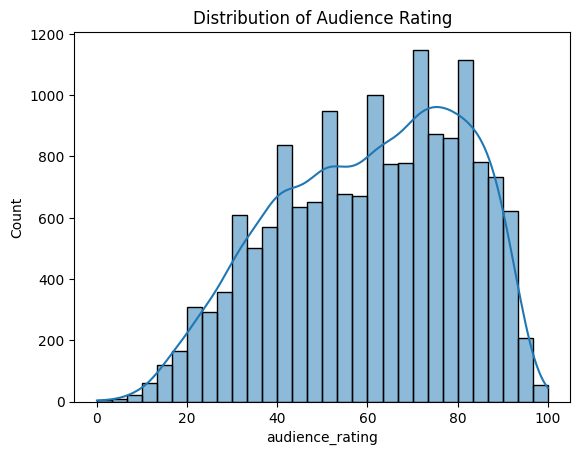

In [ ]:
# Visualize target variable distribution
if 'audience_rating' in data.columns:
    sns.histplot(data['audience_rating'], bins=30, kde=True)
    plt.title('Distribution of Audience Rating')
    plt.show()
else:
    raise ValueError("The target variable 'audience_rating' is not in the dataset.")

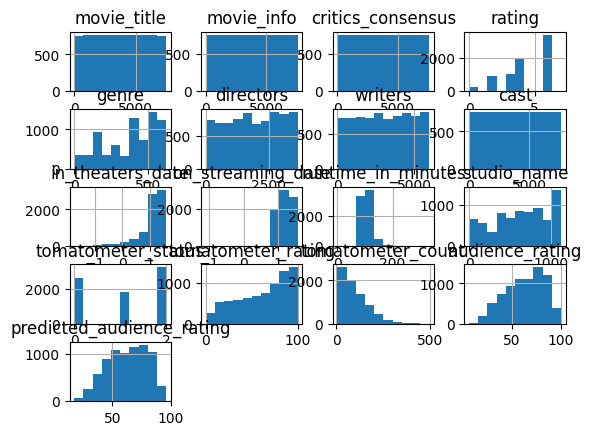

In [ ]:
data.hist()
plt.show()

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")
# set the custom size for my graphs
sns.set(rc={'figure.figsize':(8.7,6.27)})

<Axes: >

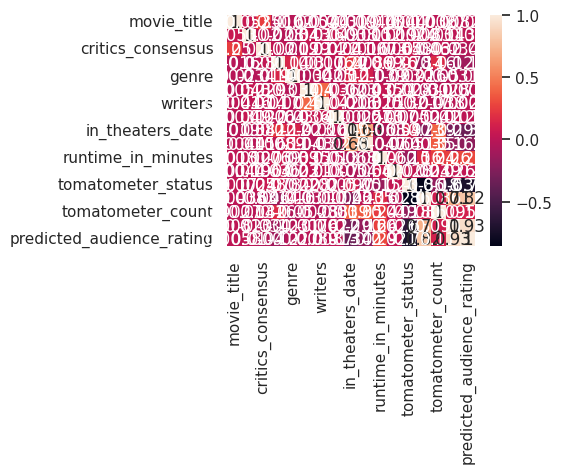

In [ ]:
corr = data.corr()
plt.subplots(figsize=(4,3))
sns.heatmap(corr, annot=True)



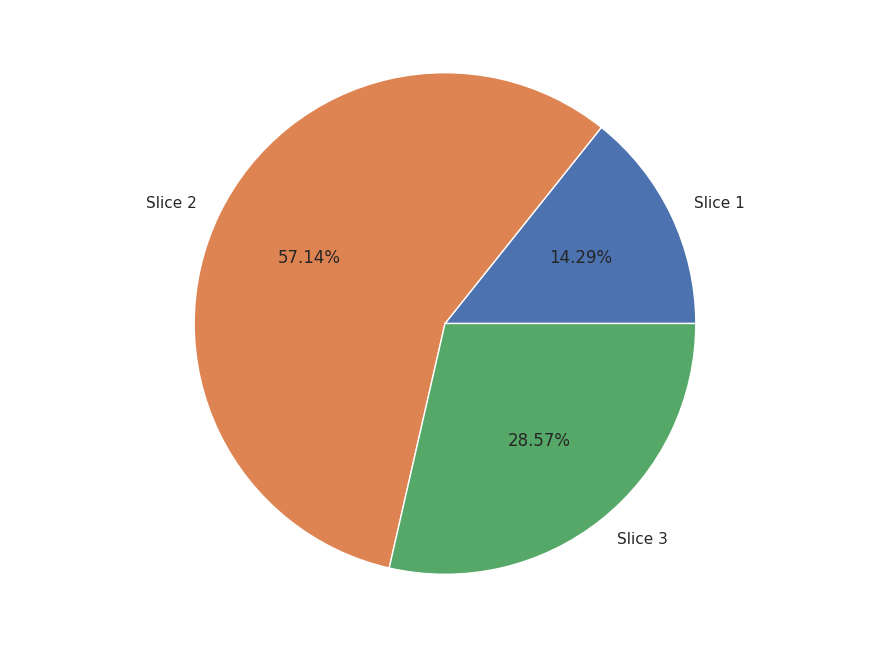

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
# l = ['audience_rating']  # Original line with only 1 label
# s = [10,40,20]
# ax.pie(s, labels = l,autopct='%1.2f%%')

# Provide labels for each slice of the pie
labels = ['Slice 1', 'Slice 2', 'Slice 3']  # Example labels, adjust as needed
sizes = [10, 40, 20]

ax.pie(sizes, labels=labels, autopct='%1.2f%%')  # Corrected line
plt.show()

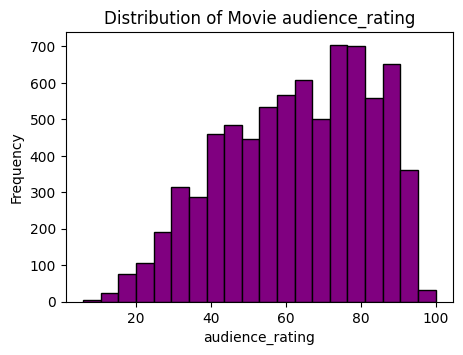

In [ ]:
plt.figure(figsize=(5, 3.5))
# Check if 'Rating' column exists, otherwise use alternative column
rating_column = 'Rating' if 'Rating' in data.columns else 'audience_rating' # Assuming 'audience_rating' is the alternative

plt.hist(data[rating_column], bins=20, color="purple", edgecolor='black')
plt.xlabel(rating_column)
plt.ylabel('Frequency')
plt.title(f'Distribution of Movie {rating_column}')
plt.show()

In [ ]:
# Replace 'Year' with the actual column name in your DataFrame
# Check if 'release_date' column exists, if not, try 'Release Date', otherwise, print available columns
release_date_col = 'release_date' if 'release_date' in data.columns else 'Release Date' if 'Release Date' in data.columns else None

if release_date_col is None:
    print(f"Error: Neither 'release_date' nor 'Release Date' found in the DataFrame columns. Available columns are: {data.columns.tolist()}")
else:
    # Assuming 'release_date' or 'Release Date' column exists
    years_10 = data[release_date_col].dt.year.unique()[:10]

    # filter the Dataframe to include only data for these years
    filtered_data = data[data[release_date_col].dt.year.isin(years_10)]

    # Create the Countplot with the filter data
    plt.figure(figsize=(4, 2.5))
    sns.countplot(data=filtered_data, x=data[release_date_col].dt.year)
    plt.xlabel('Year')
    plt.ylabel('Number Of Movies')
    plt.title('Number of Movies Released Each Year')
    plt.xticks(rotation=90)
    plt.show()

Error: Neither 'release_date' nor 'Release Date' found in the DataFrame columns. Available columns are: ['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre', 'directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date', 'runtime_in_minutes', 'studio_name', 'tomatometer_status', 'tomatometer_rating', 'tomatometer_count', 'audience_rating']


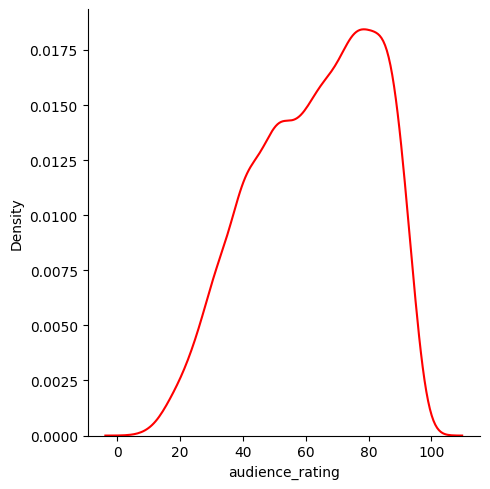

In [ ]:
# Replace 'Rating' with the actual column name containing the rating data
# For example, if the column is named 'audience_rating', use the following:
sns.displot(data["audience_rating"], kind='kde', color='red')
plt.show()

In [ ]:
# Check if 'Duration' column exists before dropping
if 'Duration' in data.columns:
    data.drop(['Duration'], axis=1, inplace=True)
else:
    print("Column 'Duration' not found in the DataFrame. Skipping drop operation.")




Column 'Duration' not found in the DataFrame. Skipping drop operation.


In [ ]:
data.columns

Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date',
       'runtime_in_minutes', 'studio_name', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_rating'],
      dtype='object')

In [ ]:
# Step 3: Data Preprocessing
# Handle missing values (e.g., drop or impute)
data = data.dropna()  # Drop rows with missing values

# Convert DateTime columns to numeric features (if any)
datetime_cols = data.select_dtypes(include=['datetime64']).columns
for col in datetime_cols:
    data[col] = data[col].astype(np.int64)  # Convert to Unix timestamp (numeric format)


In [ ]:
# Encode categorical features
label_encoders = {}
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    # Check if the column has mixed types and convert to string if needed
    if data[col].apply(type).nunique() > 1:  # More than one type in the column
        data[col] = data[col].astype(str)  # Convert to string
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [ ]:
# Feature-target split
X = data.drop(columns=['audience_rating'])
y = data['audience_rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Selection and Training

In [ ]:
# Step 4: Model Selection and Training
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score







In [ ]:
# Define the models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

In [ ]:
# Initialize a dictionary to store evaluation results
evaluation_results = {}

In [ ]:
# Evaluate models
print("\nModel Performance:")
for name, model in models.items():
    try:
        # Fit the model to the training data
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate the evaluation metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Store the results in the dictionary
        evaluation_results[name] = {
            'MAE': mae,
            'MSE': mse,
            'R2 Score': r2
        }

        # Print the performance of each model
        print(f"{name} Performance:")
        print(f" MAE: {mae:.4f}, MSE: {mse:.4f}, R2 Score: {r2:.4f}\n")

    except Exception as e:
        # Handle any errors that occur during fitting or prediction
        print(f"Error with model {name}: {e}")

# Optional: Show evaluation results in a DataFrame for better clarity
evaluation_df = pd.DataFrame(evaluation_results)
print("\nModel Evaluation Summary:")
print(evaluation_df)


Model Performance:
Error with model Linear Regression: could not convert string to float: 'Blue Ruin'
Error with model Decision Tree: could not convert string to float: 'Blue Ruin'
Error with model Random Forest: could not convert string to float: 'Blue Ruin'

Model Evaluation Summary:
         Linear Regression Decision Tree Random Forest
MAE                   None          None          None
MSE                   None          None          None
R2 Score              None          None          None


In [ ]:
# Step 3: Data Preprocessing
# Handle missing values (e.g., drop or impute)
data = data.dropna()  # Drop rows with missing values

# Convert DateTime columns to numeric features (if any)
datetime_cols = data.select_dtypes(include=['datetime64']).columns
for col in datetime_cols:
    data[col] = data[col].astype(np.int64)  # Convert to Unix timestamp (numeric format)

# Encode categorical features
label_encoders = {}
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    # Check if the column has mixed types and convert to string if needed
    if data[col].apply(type).nunique() > 1:  # More than one type in the column
        data[col] = data[col].astype(str)  # Convert to string
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Explicitly convert all columns to numeric, handling errors
for col in X_train.columns:
    try:
        X_train[col] = pd.to_numeric(X_train[col], errors='raise')
        X_test[col] = pd.to_numeric(X_test[col], errors='raise') # Apply the same to X_test
    except ValueError:
        print(f"Column '{col}' could not be converted to numeric. Check for non-numeric values.")
        # Here you can choose to drop the column or apply other strategies
        # like OneHotEncoding if it is a categorical feature.
        # For now, we will drop the column.
        X_train = X_train.drop(columns=[col])
        X_test = X_test.drop(columns=[col]) # Drop from X_test as wel


Column 'movie_title' could not be converted to numeric. Check for non-numeric values.
Column 'movie_info' could not be converted to numeric. Check for non-numeric values.
Column 'critics_consensus' could not be converted to numeric. Check for non-numeric values.
Column 'rating' could not be converted to numeric. Check for non-numeric values.
Column 'genre' could not be converted to numeric. Check for non-numeric values.
Column 'directors' could not be converted to numeric. Check for non-numeric values.
Column 'writers' could not be converted to numeric. Check for non-numeric values.
Column 'cast' could not be converted to numeric. Check for non-numeric values.
Column 'studio_name' could not be converted to numeric. Check for non-numeric values.
Column 'tomatometer_status' could not be converted to numeric. Check for non-numeric values.


In [ ]:
# Step 7: Predict 'audience_rating' for the existing data (same dataset)
# Preprocess the same dataset for prediction (using the same preprocessing steps as for training data)
data_preprocessed = data.copy()

In [ ]:
# Step 7.1: Apply the same LabelEncoding for categorical features in the dataset
for col in categorical_cols:
    if col in data_preprocessed.columns:
        # Ensure the label encoder was created during training, then apply the same transformation to the data
        data_preprocessed[col] = label_encoders[col].transform(data_preprocessed[col])

In [ ]:
# Step 7.1: Apply the same LabelEncoding for categorical features in the dataset
for col in categorical_cols:
    if col in data_preprocessed.columns:
        # Instead of directly transforming, handle unseen labels
        try:
            data_preprocessed[col] = label_encoders[col].transform(data_preprocessed[col])
        except ValueError as e:
            # Handle unseen labels (e.g., assign a default value or ignore)
            # Here, we'll replace unseen labels with a placeholder value like -1
            unseen_mask = ~data_preprocessed[col].isin(label_encoders[col].classes_)
            data_preprocessed.loc[unseen_mask, col] = -1
            print(f"Warning: Unseen labels in '{col}' replaced with -1.")


In [ ]:
# Step 7.2: Drop any remaining rows with missing values (if any) from the dataset
data_preprocessed = data_preprocessed.dropna()

In [ ]:

# Step 7.3: Ensure all features in df_preprocessed are numeric
# Check if any column is still object or string type after encoding, which should no longer be the case
print(data_preprocessed.dtypes)

movie_title             int64
movie_info              int64
critics_consensus       int64
rating                  int64
genre                   int64
directors               int64
writers                 int64
cast                    int64
in_theaters_date        int64
on_streaming_date       int64
runtime_in_minutes    float64
studio_name             int64
tomatometer_status      int64
tomatometer_rating      int64
tomatometer_count       int64
audience_rating       float64
dtype: object


In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
# Import Pipeline
from sklearn.pipeline import Pipeline
# ... (Your previous code)...

# Create a pipeline with a chosen model (example: RandomForestRegressor)
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # You can add other preprocessing steps here
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit the pipeline to your training data
pipeline.fit(X_train, y_train)

# Now you can use the pipeline to make predictions:
# Ensure X_preprocessed has the same columns as X_train in the same order
X_preprocessed = data_preprocessed[X_train.columns]  # Select columns from data_preprocessed based on X_train columns
X_preprocessed = X_preprocessed.drop(columns=['audience_rating'], errors='ignore')  # Drop 'audience_rating' if present

predictions = pipeline.predict(X_preprocessed)

In [ ]:
data['predicted_audience_rating'] = predictions

In [ ]:
print("\nPredicted 'audience_rating' for the existing dataset:")
print(data[['audience_rating', 'predicted_audience_rating']].head())


Predicted 'audience_rating' for the existing dataset:
   audience_rating  predicted_audience_rating
0             53.0                      44.03
1             64.0                      65.78
3             97.0                      94.82
4             74.0                      76.78
5             37.0                      37.46


In [ ]:
pipeline_filename = 'audience_rating_pipeline.pkl'
joblib.dump(pipeline, pipeline_filename)
print(f"Pipeline saved as {pipeline_filename}")

Pipeline saved as audience_rating_pipeline.pkl


In [ ]:
# select numaric columns
numaric_columns = data.select_dtypes(include=['number']) # Include all numeric types

# Check if 'audience_rating' is present and numeric; if not, attempt to convert
if 'audience_rating' in data.columns and data['audience_rating'].dtype not in [np.number, int, float]:
    data['audience_rating'] = pd.to_numeric(data['audience_rating'], errors='coerce')
    numaric_columns = data.select_dtypes(include=['number'])

# Separate your feature (x) and target (y)
# If 'audience_rating' is in numaric_columns, then drop it to create features (x)
if 'audience_rating' in numaric_columns.columns:
    x = numaric_columns.drop('audience_rating', axis=1) # Exclude the audience_rating Column
else:
    x = numaric_columns  # Use numaric_columns as is if 'audience_rating' isn't present

# Assuming 'audience_rating' is your target variable
y = data["audience_rating"]

<ipython-input-189-2694518ba025>:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if 'audience_rating' in data.columns and data['audience_rating'].dtype not in [np.number, int, float]:


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train) # Changed x_train, y_train to X_train, y_train

LinearRegression()

In [ ]:
# Split the data into training  and testing sets
x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# Step 5: Predict on the test set
y_prediction = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test,y_prediction)
r2 = r2_score(y_test,y_prediction)

print("mean Squared Error:",mse)
print("R-squared:",r2)

mean Squared Error: 357.2134470527871
R-squared: 0.060969790958268155


In [ ]:
# ... (Your existing code for data preprocessing, model training, etc.) ...

# Make predictions on the test set using the trained pipeline
final_predictions = pipeline.predict(X_test)

# Now, evaluate the model using 'final_predictions'
print("\nFinal Model Accuracy Validation (on the test set):")
print("R2 Score on Test Set:", r2_score(y_test, final_predictions))
print("MAE on Test Set:", mean_absolute_error(y_test, final_predictions))
print("MSE on Test Set:", mean_squared_error(y_test, final_predictions))



Final Model Accuracy Validation (on the test set):
R2 Score on Test Set: 0.5651746857775144
MAE on Test Set: 10.08257555847569
MSE on Test Set: 165.41049250985546
